In [5]:
# Data Handling , Analysis & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC                          # Support Vector Machine (SVM)
from sklearn.tree import DecisionTreeClassifier      # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest

In [8]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
dataset = pd.read_csv('pcos_dataset.csv')

In [10]:
dataset.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [11]:
dataset.shape

(1000, 6)

In [12]:
dataset.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [14]:
dataset['PCOS_Diagnosis'].value_counts()

PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64

In [15]:
dataset.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [16]:
X = dataset[['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
y = dataset['PCOS_Diagnosis']

In [17]:
scaler = StandardScaler()
X_Standardized = scaler.fit_transform(X)

In [18]:
print(X_Standardized)

[[-0.91864162  1.68515712  0.94169658 -1.51021956  0.35820607]
 [ 0.61814142  0.00263528 -1.06191317 -0.1321677   1.0658435 ]
 [ 0.02707102 -0.56496246 -1.06191317  1.40572089  1.49042596]
 ...
 [ 0.61814142  0.38779088 -1.06191317 -1.19918591  1.49042596]
 [ 1.09099774  0.1850774  -1.06191317  1.53099833 -1.19859628]
 [-1.15506978 -0.90957537  0.94169658  0.80957307 -1.48165126]]


In [19]:
# Spliting Trainig and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X_Standardized, y, test_size=0.2)

In [20]:
# Training the mode using logistic regression 
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(Y_test, log_pred)
print(f"Logistic Regression Accuracy: {log_acc:.2f}")

Logistic Regression Accuracy: 0.93


In [21]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc:.2f}")

SVM Accuracy: 0.93


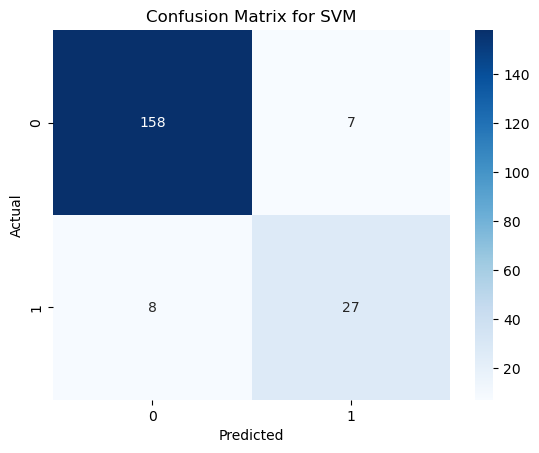

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, svm_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Random Forest Accuracy: 1.00


In [35]:
# Hyperparameter tuning for SVM
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10],   # Try different regularization strengths
    "kernel": ["linear", "rbf", "poly"],  # Try different kernels
    "gamma": ["scale", "auto"]  # Test gamma settings
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_  # Use best model

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [39]:
# Train the optimized SVM model
optimized_svm = SVC(C=1, kernel="rbf", gamma="scale", probability=True)
optimized_svm.fit(X_train, Y_train)

# Predict and check accuracy
svm_pred_optimized = optimized_svm.predict(X_test)
svm_acc_optimized = accuracy_score(Y_test, svm_pred_optimized)

print(f"🔹 Optimized SVM Accuracy: {svm_acc_optimized:.2f}")


🔹 Optimized SVM Accuracy: 0.97


In [43]:
# Converting to DataFrame 
def create_input_dataframe(age, bmi, menstrual_irregularity, testosterone_level, antral_follicle_count):
    data = {
        'Age': [age],
        'BMI': [bmi],
        'Menstrual_Irregularity': [menstrual_irregularity],
        'Testosterone_Level(ng/dL)': [testosterone_level],
        'Antral_Follicle_Count': [antral_follicle_count]
    }
    df = pd.DataFrame(data)
    return df

In [62]:
# Take input from the user
def get_user_input():
    age = int(input("Enter age: "))
    bmi = float(input("Enter BMI: "))
    menstrual_irregularity = int(input("Enter Menstrual Irregularity (0 = No, 1 = Yes): "))
    testosterone_level = float(input("Enter Testosterone Level (ng/dL): "))
    antral_follicle_count = int(input("Enter Antral Follicle Count: "))
    
    # Create the dataframe with the input values
    return create_input_dataframe(age, bmi, menstrual_irregularity, testosterone_level, antral_follicle_count)

user_input_df = get_user_input()
print("User Input DataFrame:")
print(user_input_df)

Enter age:  38
Enter BMI:  26.7
Enter Menstrual Irregularity (0 = No, 1 = Yes):  1
Enter Testosterone Level (ng/dL):  64.8
Enter Antral Follicle Count:  11


User Input DataFrame:
   Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
0   38  26.7                       1                       64.8   

   Antral_Follicle_Count  
0                     11  


In [64]:
# Extract the feature values as a numpy array without column names
user_input_array = user_input_df.values

# Make the prediction
output = optimized_svm.predict(user_input_array)

# Print the result
print(f"Prediction: {output}")

if output == 0:
    print("The prediction is: No PCOS.")
else:
    print("The prediction is: PCOS.")

Prediction: [0]
The prediction is: No PCOS.
